## PyTorch ÌïôÏäµ Î†àÎ≤® 2 - 004
---

### ÏàúÏÑú
1. _~~TensorÎ•º ÏÇ¨Ïö©Ìïú Ïã†Í≤ΩÎßù~~_
2. torch.nn.functional ÏÇ¨Ïö©ÌïòÍ∏∞
3. optmÏùÑ Ïù¥Ïö©ÌïòÏó¨ Î¶¨Ìå©ÌÜ†ÎßÅ ÌïòÍ∏∞
4. fit() ÏôÄ get_data() ÏÉùÏÑ±ÌïòÍ∏∞
5. CNN ÏúºÎ°ú ÎÑòÏñ¥Í∞ÄÍ∏∞

### TensorÎ•º ÏÇ¨Ïö©Ìïú Ïã†Í≤ΩÎßù
- Ïã†Í≤ΩÎßù Íµ¨Ï∂ï
    - FashionMNIST Î∂ÑÎ•òÍ∏∞(ÏûÖÎ†•: 784, Ï∂úÎ†•: 10)
    - Í∞ÄÏ§ëÏπòÏôÄ Ìé∏Ìñ•ÏùÑ Í∞ÄÏßÄÎäî ÏÑ†ÌòïÎ™®Îç∏
    - ÌôúÏÑ±Ìôî Ìï®Ïàò : log softmax
    - ÏÜêÏã§ Ìï®Ïàò : negative log-likelihood
    - ÌèâÍ∞Ä ÏßÄÌëú : accuracy
    - training loopÏóêÏÑúÎäî ÏïÑÎûòÏùò ÎèôÏûëÏùÑ ÏàòÌñâ
        - Îç∞Ïù¥ÌÑ∞ÏóêÏÑú Î∞∞Ïπò(64)Î•º ÏÑ†ÌÉù `DataLoader` ÏÇ¨Ïö©
        - Î™®Îç∏ÏùÑ Ïù¥Ïö©ÌïòÏó¨ ÏòàÏ∏° ÏàòÌñâ
        - ÏÜêÏã§ Í≥ÑÏÇ∞
        - `backward()`Î•º Ïù¥Ïö©ÌïòÏó¨ Î™®Îç∏Ïùò weight, bias Í∏∞Ïö∏Í∏∞ ÏóÖÎç∞Ïù¥Ìä∏

#### Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
- [FashionMNIST](https://research.zalando.com/project/fashion_mnist/fashion_mnist) Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Îã§Ïö¥Î°úÎìú
- `TorchVison` ÏßÅÏ†ëÏÇ¨Ïö©Í≥º Îã¨Î¶¨, Îç∞Ïù¥ÌÑ∞ÏÖã Îã§Ïö¥Î°úÎìú ÌõÑ Ïù¥Î•º ÏßÅÏ†ë Ï†ïÏùòÌïú `CustomDataset` ÏÇ¨Ïö©
- `data`Ìè¥ÎçîÏóê Îã§Ïö¥Î°úÎìú, `wget` Ìå®ÌÇ§ÏßÄÎ°ú Îã§Ïö¥Î°úÎìú
- FashionMNIST Îç∞Ïù¥ÌÑ∞ÏÖãÏùÄ 60000Í∞úÏùò ÌïôÏäµÏö© Îç∞Ïù¥ÌÑ∞ÏôÄ 100000Í∞úÏùò ÌÖåÏä§Ìä∏Ïö© Îç∞Ïù¥ÌÑ∞Î°ú Íµ¨Î∂Ñ
- ÌïôÏäµÏö© Îç∞Ïù¥ÌÑ∞ Ï§ë 10%(6000Í∞ú)Î•º validation setÏúºÎ°ú Î∂ÑÎ¶¨

In [54]:
# wget Î™®Îìà ÏÑ§Ïπò
!pip install wget

In [55]:
from sklearn.model_selection import train_test_split
import os
import gzip
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.utils.data import Dataset, DataLoader
import math
import time

device = torch.device('cpu')
# device = torch.device('cuda')  ## Ïó¨Í∏∞ÏÑú GPU ÏÇ¨Ïö©ÌïòÏßÄ ÎßêÍ≤É

In [56]:
import wget

In [57]:
urls = ['http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz',
        'http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz',
        'http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz',
        'http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz']

for url in urls:
    # data Ìè¥Îçî ÌïòÏúÑÏóê urlÏóê Í≤åÏû¨ÎêòÏñ¥ ÏûàÎäî ÏûêÎ£åÎ•º Îã§Ïö¥ÎèÑÎ•¥ Î∞õÎäîÎã§ 
    wget.download(url, './data')

In [58]:
# code source : https://github.com/zalandoresearch/fashion-mnist/blob/master/utils/mnist_reader.py
# gz ÌååÏùºÏùÑ Ïó¥Ïñ¥ Ïù¥ÎØ∏ÏßÄÏôÄ ÎùºÎ≤®ÏùÑ ÏùΩÏñ¥Îì§Ïó¨ Î∞òÌôò
def load_mnist(path, kind='train'):
    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)
        labels = labels.astype(np.int64)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images/255.0, labels


x_train, y_train = load_mnist('data', kind='train')
# sckit-learnÏùò train_test_split() Ìï®ÏàòÍ∞Ä Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨Ïãú Í∞ÄÏû• Ìé∏Î¶¨
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=1)
x_test, y_test = load_mnist('data', kind='t10k')

print(f'train : image{x_train.shape}/{type(x_train[0])}, label{y_train.shape}/{type(y_train[0])}')
print(f'valid : image{x_val.shape}/{type(x_val[0])}, label{y_val.shape}/{type(y_val[0])}')
print(f'test  : image{x_test.shape}/{type(x_test[0])}, label{y_test.shape}/{type(y_test[0])}')

train : image(54000, 784)/<class 'numpy.ndarray'>, label(54000,)/<class 'numpy.int64'>
valid : image(6000, 784)/<class 'numpy.ndarray'>, label(6000,)/<class 'numpy.int64'>
test  : image(10000, 784)/<class 'numpy.ndarray'>, label(10000,)/<class 'numpy.int64'>


#### Ïª§Ïä§ÌÖÄ Îç∞Ïù¥ÌÑ∞ÏÖã/Îç∞Ïù¥ÌÑ∞Î°úÎçî Ï†ïÏùò
- lbl203_*.ipynbÏóê Ï†ïÏùòÌïú CustomImageDatasetÍ≥º Ï∞®Ïù¥ ÏûàÏùå
- Ïª§Ïä§ÌÖÄ Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑúÎäî `__init__`, `__len__`, `__getitem__`ÏùÑ Ï†ïÏùòÌï¥Ïïº ÌïòÎ©¥ Í∞Å Î©îÏÑúÎìúÏóêÏÑúÎäî Îã§ÏùåÍ≥º Í∞ôÏùÄ ÏûëÏóÖÏùÑ ÏàòÌñâ
    - `__init__` : ÌÅ¥ÎûòÏä§Ïùò Î©§Î≤ÑÎ≥ÄÏàò x, y, transform, target_transformÏùÑ ÌååÎùºÎØ∏ÌÑ∞Î•º Ïù¥Ïö©ÌïòÏó¨ Ï¥àÍ∏∞Ìôî. xÎäî image Îç∞Ïù¥ÌÑ∞/yÎäî ÎùºÎ≤®/transformÏùÄ Ïù¥ÎØ∏ÏßÄÏóê Ï†ÅÏö© Îê† transform/target_transformÏùÄ ÎùºÎ≤®Ïóê Ï†ÅÏö© Îê† transformÏùÑ ÏùòÎØ∏
    - `__len__` : Îç∞Ïù¥ÌÑ∞ÏÖãÏùò ÏÉòÌîå Í∞úÏàòÎ•º Î∞òÌôò
    - `__getitem__` : Ï£ºÏñ¥ÏßÑ Ïù∏Îç±Ïä§Ïóê Ìï¥ÎãπÌïòÎäî ÏÉòÌîåÏùÑ (image, label) ÏåçÏúºÎ°ú Î∞òÌôò. Ïù¥Îïå, imageÏóêÎäî transformÏùÑ Ï†ÅÏö©ÌïòÍ≥† ÎùºÎ≤®ÏóêÎäî target_transformÏùÑ Ï†ÅÏö©ÌïòÏó¨ Î∞òÌôò


In [59]:
class CustomImageDataset(Dataset):
    def __init__(self, x, y, transform=None, target_transform=None):
        self.labels = ['T-Shirt',  'Trouser', 'Pullover', 'Dress', 'Coat', 
                       'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']
        
        self.x = x # Ïù¥ÎØ∏ÏßÄ
        self.y = y # ÎùºÎ≤®
        self.transform = transform # Ïù¥ÎØ∏ÏßÄÏóê Ï†ÅÏö© Îê† transform
        self.target_transform = target_transform # ÎùºÎ≤®Ïóê Ï†ÅÏö© Îê† transform

    def __len__(self):
        return len(self.y) # Îç∞Ïù¥ÌÑ∞ÏÖãÏùò ÏÉòÌîå Í∞úÏàò

    def __getitem__(self, idx): # Ï£ºÏñ¥ÏßÑ idxÎ≤àÏß∏Ïóê Ìï¥ÎãπÌïòÎäî ÏÉòÌîåÏùÑ Î∞òÌôò
        img = self.x[idx]
        label = self.y[idx]
        
        if self.transform:
            image = self.transform(img)
        
        if self.target_transform:
            label = self.target_transform(label)
        
        return image, label

- training loopÏóêÏÑúÎäî Î∞∞ÏπòÎ•º ÏÑ†ÌÉùÌïòÎäî Íµ¨Í∞ÑÏù¥ Ï°¥Ïû¨. Ïù¥Î•º ÏàòÏõîÌïòÍ∏∞ ÏßÑÌñâÌïòÍ∏∞ ÏúÑÌïòÏó¨ ÏúÑÏóêÏÑú `DataLoader`Î•º Ïù¥Ïö©
- `DataLoader` Ïóê Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Î∂àÎü¨Ïò® Îí§ÏóêÎäî ÌïÑÏöîÏóê Îî∞Îùº Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ ÏàúÌöå(iterate) Í∞ÄÎä•. 
    - ÏïÑÎûòÏùò Í∞Å ÏàúÌöå(iteration)Îäî (Í∞ÅÍ∞Å `batch_size=64` Ïùò ÌäπÏßï(feature)Í≥º Ï†ïÎãµ(label)ÏùÑ Ìè¨Ìï®ÌïòÎäî) `train_features` ÏôÄ `train_labels` Ïùò Î¨∂Ïùå(batch)ÏùÑ Î∞òÌôò
    - `shuffle=True` Î°ú ÏßÄÏ†ïÌñàÏúºÎØÄÎ°ú, Î™®Îì† Î∞∞ÏπòÎ•º ÏàúÌöåÌïú Îí§ Îç∞Ïù¥ÌÑ∞Í∞Ä ÏÑûÏûÑ. 
    - (Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞ ÏàúÏÑúÎ•º Î≥¥Îã§ ÏÑ∏Î∞ÄÌïòÍ≤å(finer-grained) Ï†úÏñ¥ÌïòÎ†§Î©¥ [Samplers](https://pytorch.org/docs/stable/data.html#data-loading-order-and-sampler) Î•º Ï∞∏Ï°∞)

In [60]:
train_ds = CustomImageDataset(x_train, y_train, 
                              transform=torch.Tensor)
val_ds = CustomImageDataset(x_val, y_val, 
                            transform=torch.Tensor)

x_test = torch.Tensor(x_test).to(device)
y_test = torch.from_numpy(y_test).to(device) # from_numpy() : np.arrayÎ•º tensorÎ°ú Î≥ÄÌôò

train_dl = DataLoader(train_ds, batch_size=64, shuffle=True)
val_dl = DataLoader(val_ds, batch_size=64, shuffle=True)

train_dl, val_dl

(<torch.utils.data.dataloader.DataLoader at 0x1b7313ac890>,
 <torch.utils.data.dataloader.DataLoader at 0x1b692d8e250>)

##### Ï†ïÏÉÅÏÉùÏÑ± ÌôïÏù∏

In [61]:
def get_label_name(label): # ÎùºÎ≤®(Ïà´Ïûê)Î•º ÏûÖÎ†•Î∞õÏïÑ Ìï¥Îãπ ÎùºÎ≤®Ïùò ÏùòÎØ∏Î•º Î∞òÌôò
    LABLE_NAMES = ['T-Shirt',  'Trouser', 'Pullover', 'Dress', 'Coat', 
                    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']
    return LABLE_NAMES[label]

In [62]:
def show_batch(features, labels):
    fig = plt.figure(figsize=(10, 10))

    for i in range(1, 65):
        img = features[i-1]
        label = get_label_name(labels[i-1])
        ax = fig.add_subplot(8, 8, i)
        
        
        if device.type  == 'cuda':
            img = img.cpu()
        ax.imshow(img.reshape(28,28), cmap='gray_r')
        ax.set_title(label)
        ax.set_xticks([]), ax.set_yticks([])

    plt.tight_layout()
    plt.show()

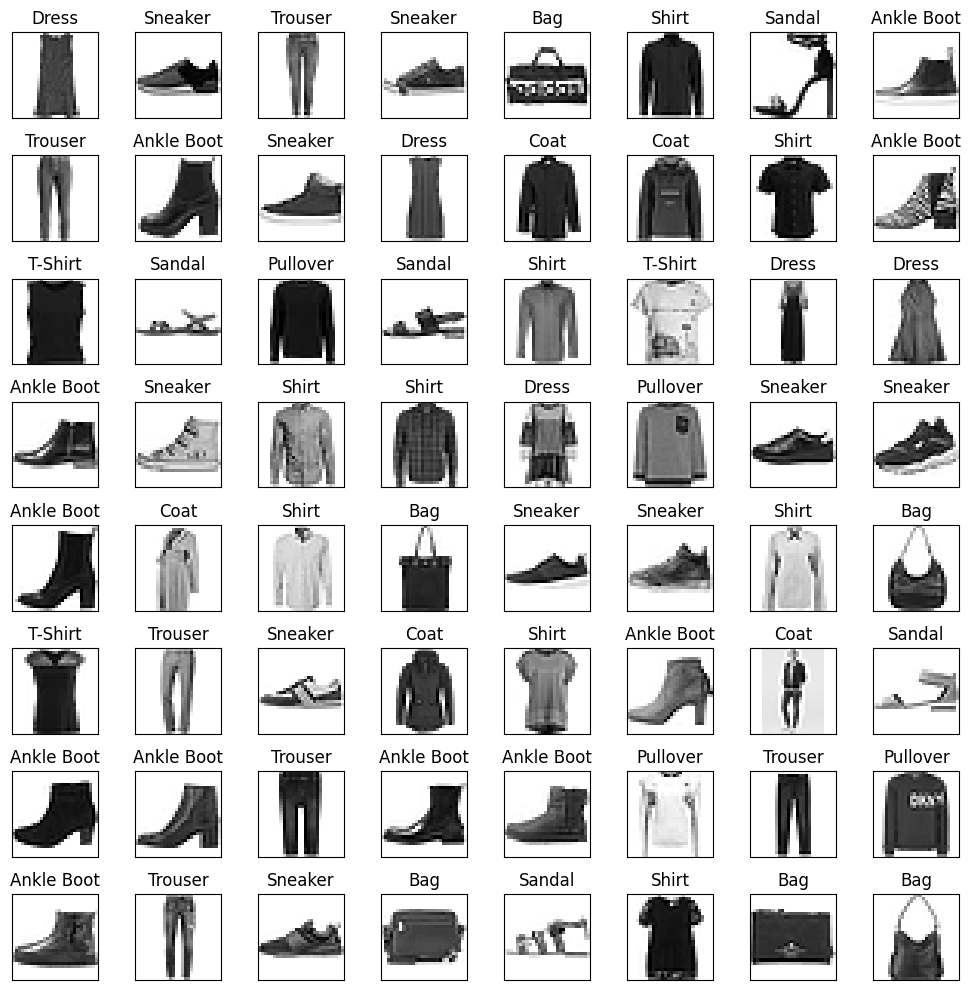

In [63]:
features, labels = next(iter(train_dl))
features, labels = features.to(device), labels.to(device)
show_batch(features, labels)

#### Ïã†Í≤ΩÎßù Ï†ïÏùò

##### Í∞ÄÏ§ëÏπò
- ÎûúÎç§ ÎòêÎäî 0ÏúºÎ°úÎßå Ïù¥Î£®Ïñ¥ÏßÑ ÌÖêÏÑúÎ•º ÏÉùÏÑ±ÌïòÎäî Î©îÏÑúÎìúÎ•º Ï†úÍ≥µ, Í∞ÑÎã®Ìïú ÏÑ†Ìòï Î™®Îç∏Ïùò Í∞ÄÏ§ëÏπò(weights)ÏôÄ Ï†àÌé∏(bias)ÏùÑ ÏÉùÏÑ±ÌïòÍ∏∞ ÏúÑÌï¥ÏÑú Ïù¥Í≤ÉÏùÑ ÏÇ¨Ïö©Ìï† ÏòàÏ†ï
- Ïö∞Î¶¨Îäî PyTorchÏóêÍ≤å Ïù¥Îì§Ïù¥ Í∏∞Ïö∏Í∏∞(gradient)Í∞Ä ÌïÑÏöîÌïòÎã§Í≥† ÏïåÎ†§Ï§å
- Ïù¥Î•º ÌÜµÌï¥ PyTorchÎäî ÌÖêÏÑúÏóê ÌñâÌï¥ÏßÄÎäî Î™®Îì† Ïó∞ÏÇ∞ÏùÑ Í∏∞Î°ù, *ÏûêÎèôÏ†ÅÏúºÎ°ú* Ïó≠Ï†ÑÌåå(back-propagation) ÎèôÏïàÏóê Í∏∞Ïö∏Í∏∞Î•º Í≥ÑÏÇ∞Ìï† Ïàò ÏûàÏùå
- Í∞ÄÏ§ëÏπòÏóê ÎåÄÌï¥ÏÑúÎäî `requires_grad_` Î•º Ï¥àÍ∏∞Ìôî(initialization) **Îã§ÏùåÏóê** ÏÑ§Ï†ï. ÏôúÎÉêÌïòÎ©¥ Ìï¥Îãπ Îã®Í≥ÑÍ∞Ä Í∏∞Ïö∏Í∏∞Ïóê Ìè¨Ìï®ÎêòÎäî Í≤ÉÏùÑ ÏõêÏπò ÏïäÍ∏∞ ÎïåÎ¨∏
    - (PyTorchÏóêÏÑú `_` Îã§ÏùåÏóê Ïò§Îäî Î©îÏÑúÎìú Ïù¥Î¶ÑÏùÄ Ïó∞ÏÇ∞Ïù¥ Ïù∏ÌîåÎ†àÏù¥Ïä§(in-place)Î°ú ÏàòÌñâÎêòÎäî Í≤ÉÏùÑ ÏùòÎØ∏)

- [Xavier initialisation](http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf) Í∏∞Î≤ïÏùÑ Ïù¥Ïö©ÌïòÏó¨ Í∞ÄÏ§ëÏπò Ï¥àÍ∏∞Ìôî.
    - Standard gaussianÏùÑ Ïù¥Ïö©Ìï¥ ÏÉùÏÑ±Ìïú ÎÇúÏàòÎ•º 'ÏûÖÎ†•Ïùò Ïàò'Î°ú ÎÇòÎàÑÏñ¥ Ïä§ÏºÄÏùºÎßÅ. Ïù¥Ïóê ÎåÄÌï¥ÏÑúÎäî cs231n lec6Ïóê Îã§Î§ÑÏßê


- ÏûÖÎ†•Ïù¥ÎØ∏ÏßÄÎäî reshapeÎ°ú 28 * 28Î°ú Î≥ÄÍ≤ΩÌïòÏòÄÍ≥†, 28 x 28 = 784
- ÎùºÎ≤®(Ï∂úÎ†•) Í∞úÏàòÎäî 10Í∞ú 

In [64]:
weights = torch.randn(784, 10, device=device) / math.sqrt(784) # 784Ïó¥ 10Ìñâ ÌÅ¨Í∏∞Ïùò ÌèâÍ∑†Ïù¥ 0 Ïù¥Í≥† Î∂ÑÏÇ∞Ïù¥ 1Ïù∏ Ï†ïÍ∑ú Î∂ÑÌè¨(ÌëúÏ§Ä Ï†ïÍ∑ú Î∂ÑÌè¨ÎùºÍ≥†ÎèÑ Ìï®)Ïùò ÎÇúÏàòÎ°ú Ï±ÑÏõåÏßÑ ÌÖêÏÑúÎ•º Î∞òÌôò
weights.requires_grad_()
bias = torch.zeros(10, device=device, requires_grad=True)
weights, bias

(tensor([[ 0.0159, -0.0333,  0.0764,  ..., -0.0439, -0.0095,  0.0239],
         [-0.0277,  0.0504, -0.0635,  ..., -0.0220,  0.0193, -0.0116],
         [-0.0365, -0.0471,  0.0142,  ...,  0.0014, -0.0649, -0.0123],
         ...,
         [-0.0054,  0.0525, -0.0839,  ...,  0.0449,  0.0194,  0.0209],
         [ 0.0390,  0.0401,  0.0023,  ..., -0.0058, -0.0828, -0.0230],
         [-0.0193, -0.0344, -0.0008,  ...,  0.0125,  0.0111,  0.0034]],
        requires_grad=True),
 tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], requires_grad=True))

#### Î™®Îç∏, ÌôúÏÑ±Ìôî Ìï®Ïàò
- PyTorchÏùò Í∏∞Ïö∏Í∏∞Î•º ÏûêÎèôÏúºÎ°ú Í≥ÑÏÇ∞Ìï¥Ï£ºÎäî Í∏∞Îä• ÎçïÎ∂ÑÏóê, Python ÌëúÏ§Ä Ìï®Ïàò(ÎòêÎäî Ìò∏Ï∂ú Í∞ÄÎä•Ìïú Í∞ùÏ≤¥)Î•º Î™®Îç∏Î°ú ÏÇ¨Ïö© Í∞ÄÎä•
- Í∞ÑÎã®Ìïú ÏÑ†Ìòï Î™®Îç∏ÏùÑ ÎßåÎì§Í∏∞ ÏúÑÌï¥ÏÑú Îã®ÏàúÌïú ÌñâÎ†¨ Í≥±ÏÖàÍ≥º Î∏åÎ°úÎìúÏ∫êÏä§Ìä∏(broadcast) ÎçßÏÖàÏùÑ ÏÇ¨Ïö©
- ÌôúÏÑ±Ìôî Ìï®Ïàò(activation function)Í∞Ä ÌïÑÏöîÌïòÎØÄÎ°ú,`log_softmax` Î•º Íµ¨ÌòÑÌïòÍ≥† ÏÇ¨Ïö©

In [65]:
# softmax Ìï®ÏàòÏóê logÎ•º Ï∑®ÌïúÍ≤ÉÍ≥º ÎèôÏùº
# ÌïòÏßÄÎßå, Îëê Ïó∞ÏÇ∞ÏùÑ Îî∞Î°ú ÏàòÌñâÌïòÎäî Í≤ÉÎ≥¥Îã§ Îçî Îπ†Î•¥Í≥† ÏàòÏπòÏ†ÅÏúºÎ°ú ÏïàÏ†ïÏ†Å
def log_softmax(x):
    return x - x.exp().sum(-1).log().unsqueeze(-1) # unsqueeze() : ÌäπÏ†ïÏúÑÏπòÏóê 1Ïù∏Ï∞®ÏõêÏùÑ Ï∂îÍ∞ÄÌï®

def model(xb):
    return log_softmax(xb @ weights + bias)  # Ï†êÍ≥±(dot product) Ïó∞ÏÇ∞

- Ïã§Ï†úÏ†ÅÏúºÎ°ú PyTorchÏóêÏÑúÎäî ReLU ÌôúÏÑ±Ìôî Ìï®ÏàòÍ∞Ä Í∞ÄÏû• ÎßéÏù¥ Ïì∞ÏûÑ.
- log_softmax Ï†ïÏùòÎ•º ÏïåÍ≥† Ïã∂ÏúºÎ©¥ [ÎßÅÌÅ¨](https://discuss.pytorch.org/t/log-softmax-function-in-pytorch-tutorial-example/52041)

- `@` Í∏∞Ìò∏Îäî Ï†êÍ≥±(dot product) Ïó∞ÏÇ∞
- ÌïòÎÇòÏùò Î∞∞Ïπò(batch) Îç∞Ïù¥ÌÑ∞(Ïù¥ Í≤ΩÏö∞ÏóêÎäî 64Í∞úÏùò Ïù¥ÎØ∏ÏßÄÎì§)Ïóê ÎåÄÌïòÏó¨ Ìï®ÏàòÎ•º Ìò∏Ï∂ú

In [66]:
preds = model(features)  # ÏòàÏ∏°
print(f'preds[0] : {preds[0]}\npreds.shape : {preds.shape}')

preds[0] : tensor([-2.8868, -2.3826, -1.5564, -1.6993, -2.4079, -3.0220, -2.5171, -2.7223,
        -2.4933, -2.4026], grad_fn=<SelectBackward0>)
preds.shape : torch.Size([64, 10])


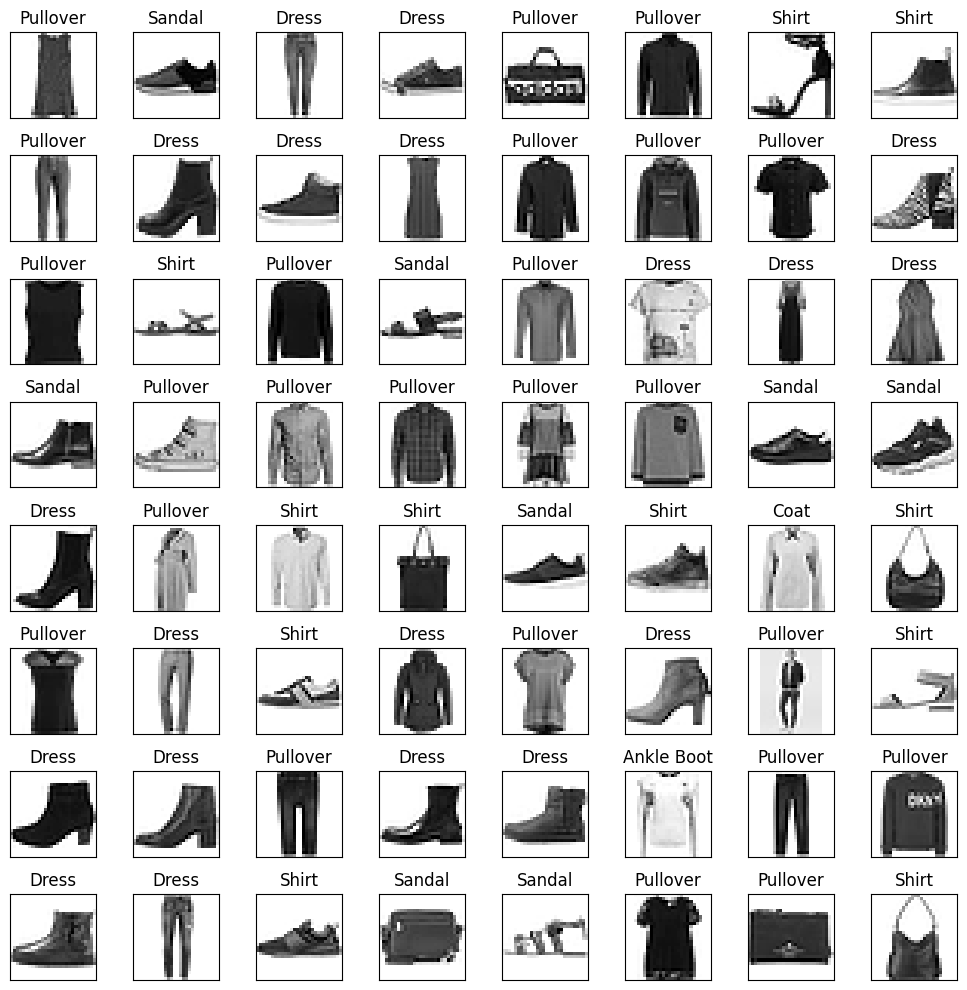

In [67]:
preds_label = torch.argmax(preds, -1)
show_batch(features, preds_label)

- ÏòàÏ∏° Í≤∞Í≥ºÍ∞Ä ÏóâÎßù(!)Ïù¥ÎùºÎäî Í≤ÉÏùÑ Ïïå Ïàò ÏûàÏùå

#### ÏÜêÏã§ Ìï®Ïàò

- `preds` ÌÖêÏÑú(tensor)Îäî ÌÖêÏÑú Í∞í Ïô∏ÏóêÎèÑ, Í∏∞Ïö∏Í∏∞ Ìï®Ïàò(gradient function)Î•º Ìè¨Ìï®.
- ÎÇòÏ§ëÏóê Ïù¥Í≤ÉÏùÑ Ïó≠Ï†ÑÌåå(backpropagation)Î•º ÏúÑÌï¥ ÏÇ¨Ïö©
- ÏÜêÏã§Ìï®Ïàò Ï∞®Î°Ä  `ÏùåÏùò Î°úÍ∑∏ Ïö∞ÎèÑ(Negative Log-Likelihood)`Î•º Íµ¨ÌòÑ

- SoftMax

    <img src="https://raw.githubusercontent.com/hugoMGSung/study-pytorch/refs/heads/main/images/torch0021.png" width="700">

- Negative Log-Likehood(NLL)

    <img src="https://raw.githubusercontent.com/hugoMGSung/study-pytorch/refs/heads/main/images/torch0022.png" width="700">

- `Negative Log Likelihood (NLL)`Îäî Î∂ÑÎ•ò Î¨∏Ï†úÏóêÏÑú Ï£ºÎ°ú ÏÇ¨Ïö©ÎêòÎäî ÏÜêÏã§ Ìï®Ïàò. ÏòàÏ∏°Îêú ÌôïÎ•† Î∂ÑÌè¨ÏôÄ Ïã§Ï†ú Î†àÏù¥Î∏î Í∞ÑÏùò Ï∞®Ïù¥Î•º Ï∏°Ï†ï
- `nll Ìï®Ïàò`Îäî pred (Î™®Îç∏Ïùò ÏòàÏ∏°)ÏôÄ target (Ï†ïÎãµ Î†àÏù¥Î∏î)ÏùÑ ÏûÖÎ†•ÏúºÎ°ú Î∞õÏïÑÏÑú, Í∞Å ÏÉòÌîåÏóê ÎåÄÌï¥ Îã§ÏùåÍ≥º Í∞ôÏùÄ ÏûëÏóÖÏùÑ ÏàòÌñâ
    - `pred[range(target.shape[0]), target]` - Í∞Å ÏÉòÌîåÏùò Ïã§Ï†ú ÌÅ¥ÎûòÏä§Ïóê Ìï¥ÎãπÌïòÎäî ÏòàÏ∏° ÌôïÎ•†ÏùÑ ÏÑ†ÌÉù
    - `range(target.shape[0])`Îäî Í∞Å ÏÉòÌîåÏùò Ïù∏Îç±Ïä§
    - `target`ÏùÄ Í∞Å ÏÉòÌîåÏóê ÎåÄÌïú Ïã§Ï†ú ÌÅ¥ÎûòÏä§ Î†àÏù¥Î∏î. Ïù¥ ÎëòÏùÑ Ïù¥Ïö©, ÏòàÏ∏° ÌôïÎ•†ÏóêÏÑú Ïã§Ï†ú ÌÅ¥ÎûòÏä§Ïóê Ìï¥ÎãπÌïòÎäî ÌôïÎ•†Í∞í Ï∂îÏ∂ú

- Ïòà
    -  target = [1, 2, 0]
    - 
        `python
        pred = [[0.1, 0.2, 0.7],
                [0.3, 0.4, 0.3],
                [0.9, 0.05, 0.05]]
        `
    - pred[range(3), target]ÏùÄ [0.2, 0.3, 0.9] (Ïã§Ï†ú ÌÅ¥ÎûòÏä§Ïóê Ìï¥ÎãπÌïòÎäî ÌôïÎ•† Í∞íÎì§)
    - `-pred[range(target.shape[0]), target]` -  `-log(p)` Í≥ÑÏÇ∞
    - `mean()` - ÏÜêÏã§ Í∞íÏùò ÌèâÍ∑†

In [68]:
def nll(pred, target):
    return -pred[range(target.shape[0]), target].mean()

loss_func = nll # ÏÜêÏã§Ìï®ÏàòÎ•º nllÎ°ú ÏßÄÏ†ï

- Î¨¥ÏûëÏúÑ Î™®Îç∏Ïóê ÎåÄÌïú ÏÜêÏã§ÏùÑ Ï†êÍ≤Ä

In [69]:
yb =labels
print(loss_func(preds, yb))

tensor(2.3280, grad_fn=<NegBackward0>)


#### ÌèâÍ∞ÄÏßÄÌëú accuracy
- Î™®Îç∏Ïùò Ï†ïÌôïÎèÑ(accuracy)Î•º Í≥ÑÏÇ∞ÌïòÍ∏∞ ÏúÑÌïú Ìï®ÏàòÎ•º Íµ¨ÌòÑ. Îß§ ÏòàÏ∏°ÎßàÎã§, ÎßåÏïΩ Í∞ÄÏû• ÌÅ∞ Í∞íÏùò Ïù∏Îç±Ïä§Í∞Ä Î™©ÌëúÍ∞í(target value)Í≥º ÎèôÏùºÌïòÎã§Î©¥, Í∑∏ ÏòàÏ∏°ÏùÄ Ïò¨Î∞îÎ•∏ Í≤É

In [70]:
def accuracy(out, yb): # yb: y batch
    preds = torch.argmax(out, dim=1) # torch.argmax(ÏûÖÎ†•, dim) : Ï∞®Ïõê(dim)ÏóêÏÑú (ÏûÖÎ†•)ÌÖêÏÑúÏùò ÏµúÎåÄÍ∞í Ïù∏Îç±Ïä§Î•º Î∞òÌôò
    return (preds == yb).float().mean()

In [71]:
print(accuracy(preds, yb))

tensor(0.1406)


<div class="alert alert-info">
    <b>üìå Tip</b><p>This is an info alert box.</p>
</div>

<div class="alert alert-success">
    This is a success alert box.
</div>

<div class="alert alert-warning">
    This is a warning alert box.
</div>

<div class="alert alert-danger">
    This is a danger alert box.
</div>

- `class="alert alert-light"`, `class="alert alert-dark"`, `class="alert alert-primary"`, `class="alert alert-secondary"` Îäî ÏÇ¨Ïö© Í∂åÌïòÏßÄ ÏïäÏùå. Î™®Ïñë ÎòëÍ∞ôÏùå
- `class="alert alert-dark"` ÌïòÎÇòÎßå ÏÇ¨Ïö©ÌïòÎ©¥ ÎèôÏùºÌïú Ìö®Í≥º

<div class="alert alert-dark">
    This is a dark alert box.
</div>

#### training loop(ÌõàÎ†® Î£®ÌîÑ) Ï†ïÏùò
- ÌõàÎ†® Î£®ÌîÑ(training loop)Î•º Ïã§Ìñâ Í∞ÄÎä•. Îß§ Î∞òÎ≥µÎßàÎã§, Ïö∞Î¶¨Îäî Îã§ÏùåÏùÑ ÏàòÌñâ
    - Îç∞Ïù¥ÌÑ∞Ïùò ÎØ∏ÎãàÎ∞∞ÏπòÎ•º ÏÑ†ÌÉù
    - Î™®Îç∏ÏùÑ Ïù¥Ïö©ÌïòÏó¨ ÏòàÏ∏° ÏàòÌñâ
    - ÏÜêÏã§ Í≥ÑÏÇ∞
    - `loss.backward()` Î•º Ïù¥Ïö©ÌïòÏó¨ Î™®Îç∏Ïùò Í∏∞Ïö∏Í∏∞ ÏóÖÎç∞Ïù¥Ìä∏, Ïù¥ Í≤ΩÏö∞ÏóêÎäî, `weights` ÏôÄ `bias`.

- Ïù¥ Í∏∞Ïö∏Í∏∞Îì§ÏùÑ Ïù¥Ïö©ÌïòÏó¨ Í∞ÄÏ§ëÏπòÏôÄ Ï†àÌé∏ÏùÑ ÏóÖÎç∞Ïù¥Ìä∏
- Ïù¥Í≤ÉÏùÑ `torch.no_grad()` Ïª®ÌÖçÏä§Ìä∏ Îß§ÎãàÏ†∏(context manager) ÎÇ¥ÏóêÏÑú Ïã§Ìñâ - Ïù¥Îü¨Ìïú Ïã§ÌñâÏù¥ Îã§Ïùå Í∏∞Ïö∏Í∏∞Ïùò Í≥ÑÏÇ∞Ïóê Í∏∞Î°ùÎêòÏßÄ ÏïäÍ∏∞ÏúÑÌï¥ÏÑú
- PyTorchÏùò ÏûêÎèô Í∏∞Ïö∏Í∏∞(Autograd)Í∞Ä Ïñ¥ÎñªÍ≤å Ïó∞ÏÇ∞ÏùÑ Í∏∞Î°ù [ÎßÅÌÅ¨](https://pytorch.org/docs/stable/notes/autograd.html) ÌôïÏù∏

- Ïù¥ÌõÑ Í∏∞Ïö∏Í∏∞Î•º 0ÏúºÎ°ú ÏÑ§Ï†ïÌï©ÎãàÎã§, Í∑∏ÎüºÏúºÎ°úÏç® Îã§Ïùå Î£®ÌîÑ(loop)Ïóê Ï§ÄÎπÑ
- Í∑∏Î†áÏßÄ ÏïäÏúºÎ©¥, Ïö∞Î¶¨Í∞Ä Í≥ÑÏÇ∞Ìïú Í∏∞Ïö∏Í∏∞Îì§ÏùÄ ÏùºÏñ¥ÎÇú Î™®Îì† Ïó∞ÏÇ∞Ïùò ÎàÑÏ†Å ÏßëÍ≥ÑÎ•º Í∏∞Î°ù
    - `loss.backward()` Í∞Ä Ïù¥ÎØ∏ Ï†ÄÏû•Îêú Í≤ÉÏùÑ ÎåÄÏ≤¥ÌïòÍ∏∞Î≥¥Îã®, Í∏∞Ï°¥ Í∞íÏóê Í∏∞Ïö∏Í∏∞Î•º *ÎçîÌïòÍ≤å* Îê®Îê®

In [72]:
from IPython.core.debugger import set_trace

# Î™®Îç∏ ÌõàÎ†® Ï†ÑÏóê ÏÜêÏã§Í∞íÍ≥º Ï†ïÌôïÎèÑÎ•º Ï∂úÎ†•
print(f'[before] loss : {loss_func(model(x_test), y_test)}')  # ÌõàÎ†® Ï†ÑÏóê ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î°ú ÏÜêÏã§
print(f'[before] acc : {accuracy(model(x_test), y_test)}')  # ÌõàÎ†® Ï†ÑÏóê ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î°ú Ï†ïÌôïÎèÑ

lr = 0.5  # ÌïôÏäµÎ•†(learning rate)
epochs = 8  # ÌõàÎ†®Ïóê ÏÇ¨Ïö©Ìï† ÏóêÌè≠(epoch) Ïàò

for epoch in range(epochs):     # ÏóêÌè≠ÎßåÌÅº ÌõàÎ†® Î∞òÎ≥µ
    # ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ ÎØ∏ÎãàÎ∞∞ÏπòÎ°ú ÏàúÌöå
    for xb, yb in train_dl:
        # set_trace()Î•º ÌôúÏÑ±ÌôîÌïòÎ©¥ ÎîîÎ≤ÑÍπÖÏùÑ ÏúÑÌïú Î∏åÎ†àÏù¥ÌÅ¨Ìè¨Ïù∏Ìä∏Í∞Ä ÏÑ§Ï†ïÎê©ÎãàÎã§.
        # set_trace()

        # ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞ÏôÄ Î†àÏù¥Î∏îÏùÑ ÏßÄÏ†ïÎêú device (GPU ÎòêÎäî CPU)Î°ú Ïù¥Îèô
        xb = xb.to(device) # ÏßÄÏ†ïÎêú deviceÎ∞è (ÏÑ†ÌÉù ÏÇ¨Ìï≠) ÌÖêÏÑúÎ•º Î∞òÌôò
        yb = yb.to(device)

        pred = model(xb)  # Î™®Îç∏ ÏòàÏ∏°Í∞í Í≥ÑÏÇ∞
        loss = loss_func(pred, yb)      # ÏÜêÏã§ Ìï®Ïàò Í≥ÑÏÇ∞

        loss.backward()     # ÏÜêÏã§Í∞íÏóê ÎåÄÌï¥ Ïó≠Ï†ÑÌåå(Backpropagation) ÏàòÌñâ

        with torch.no_grad():        # torch.no_grad()Î•º ÏÇ¨Ïö©ÌïòÏó¨ Í∑∏ÎûòÎîîÏñ∏Ìä∏Î•º Ï∂îÏ†ÅÌïòÏßÄ ÏïäÏùå
            # Í∞ÄÏ§ëÏπò ÏóÖÎç∞Ïù¥Ìä∏ (Í≤ΩÏÇ¨ÌïòÍ∞ïÎ≤ï)
            weights -= weights.grad * lr        # ÌïôÏäµÎ•†ÏùÑ Í≥±Ìï¥ÏÑú Í∞ÄÏ§ëÏπò ÏóÖÎç∞Ïù¥Ìä∏
            bias -= bias.grad * lr              # ÌïôÏäµÎ•†ÏùÑ Í≥±Ìï¥ÏÑú Î∞îÏù¥Ïñ¥Ïä§ ÏóÖÎç∞Ïù¥Ìä∏

             # Îã§Ïùå ÏóÖÎç∞Ïù¥Ìä∏Î•º ÏúÑÌï¥ Í∑∏ÎûòÎîîÏñ∏Ìä∏ Ï¥àÍ∏∞Ìôî
            weights.grad.zero_()        # Í∞ÄÏ§ëÏπòÏùò Í∑∏ÎûòÎîîÏñ∏Ìä∏Î•º 0ÏúºÎ°ú Ï¥àÍ∏∞Ìôî
            bias.grad.zero_()           # Î∞îÏù¥Ïñ¥Ïä§Ïùò Í∑∏ÎûòÎîîÏñ∏Ìä∏Î•º 0ÏúºÎ°ú Ï¥àÍ∏∞Ìôî
            

    # Îß§ ÏóêÌè≠ ÌõÑÏóê Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ÏÖãÏúºÎ°ú Î™®Îç∏ ÏÑ±Îä• ÌèâÍ∞Ä
    with torch.no_grad():           # Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ÏóêÏÑúÎäî Í∏∞Ïö∏Í∏∞ Í≥ÑÏÇ∞ÏùÑ ÌïòÏßÄ ÏïäÏùå
        val_loss, val_acc = 0, 0

        # Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ ÎØ∏ÎãàÎ∞∞ÏπòÎ°ú ÏàúÌöå
        for xb, yb in val_dl:
            xb = xb.to(device)      # ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞
            yb = yb.to(device)      # Î†àÏù¥Î∏î

            # Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ÏÖãÏóê ÎåÄÌïú ÏÜêÏã§Í∞í ÎàÑÏ†Å
            val_loss += loss_func(model(xb), yb)
             # Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ÏÖãÏóê ÎåÄÌïú Ï†ïÌôïÎèÑ ÎàÑÏ†Å
            val_acc += accuracy(model(xb), yb)

     # Îß§ ÏóêÌè≠ ÌõÑ, Í≤ÄÏ¶ù ÏÜêÏã§Í≥º Ï†ïÌôïÎèÑÎ•º Ï∂úÎ†•  
    print(f'epoch {epoch+1} >>> val loss({val_loss / len(val_dl):.7f}), acc({val_acc / len(val_dl):.7f})')

# ÌõàÎ†® ÌõÑ ÏÜêÏã§Í≥º Ï†ïÌôïÎèÑÎ•º Ï∂úÎ†• (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌï¥)      
print(f'[after ] loss : {loss_func(model(x_test), y_test)}')  # ÌõàÎ†® ÌõÑ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î°ú ÏÜêÏã§
print(f'[after ] acc : {accuracy(model(x_test), y_test)}')  # ÌõàÎ†® ÌõÑ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î°ú Ï†ïÌôïÎèÑÎ•º Ï∂úÎ†•

[before] loss : 2.2706141471862793
[before] acc : 0.13660000264644623
epoch 1 >>> val loss(1.1083614), acc(0.7808068)
epoch 2 >>> val loss(0.8819935), acc(0.7952127)
epoch 3 >>> val loss(1.3096358), acc(0.8020279)
epoch 4 >>> val loss(2.9426296), acc(0.7039561)
epoch 5 >>> val loss(0.9387674), acc(0.7875111)
epoch 6 >>> val loss(1.3588092), acc(0.7715536)
epoch 7 >>> val loss(1.4482601), acc(0.8122783)
epoch 8 >>> val loss(1.0021157), acc(0.8040226)
[after ] loss : 1.0572803020477295
[after ] acc : 0.7942000031471252


- AutogradÏóêÏÑú Î≥¥ÏïòÎçò sin Ìï®Ïàò ÏòàÏ∏° Ïã†Í≤ΩÎßù, ÌïôÏäµÍ≥ºÏ†ïÏóê Í∏∞Ïö∏Í∏∞Î•º 0ÏúºÎ°ú ÏÑ§Ï†ïÌñàÏùÑ ÎïåÏôÄ Í∑∏Îü¨ÏßÄ ÏïäÏïòÏùÑ Í≤ΩÏö∞Î°ú Ï∞®Ïù¥Î•º Î¥Ñ

In [73]:
import torch
import math
import matplotlib.pyplot as plt

In [74]:
def get_grad_hist(mode):   # gradient Î≥ÄÌôîÎèÑ Í∏∞Î°ùÏùÑ ÏúÑÌï¥ ÏÇ¨Ïö©ÌïòÎäî Ìï®Ïàò
    dtype = torch.float     # Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ ÏÑ§Ï†ï

    # xÎäî -œÄÏóêÏÑú œÄÍπåÏßÄ 2000Í∞úÏùò Í∞íÏúºÎ°ú Íµ¨ÏÑ±Îêú ÌÖêÏÑú
    x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
    y = torch.sin(x)        # yÎäî sin(x) Ìï®ÏàòÏùò Í∞í

    # a, b, c, dÎäî Ï¥àÍ∏∞ÌôîÎêú Í∞ÄÏ§ëÏπòÎì§Î°ú, ÌïôÏäµÌï† Î≥ÄÏàòÎ°ú ÏÑ§Ï†ï
    a = torch.randn((), device=device, dtype=dtype, requires_grad=True)
    b = torch.randn((), device=device, dtype=dtype, requires_grad=True)
    c = torch.randn((), device=device, dtype=dtype, requires_grad=True)
    d = torch.randn((), device=device, dtype=dtype, requires_grad=True)

    grad_log = [[], [], [], []]     # Í∞Å Í∞ÄÏ§ëÏπòÏùò Í∏∞Ïö∏Í∏∞Î•º Í∏∞Î°ùÌï† Î¶¨Ïä§Ìä∏

    learning_rate = 1e-6        # ÌïôÏäµÎ•† ÏÑ§Ï†ï
    for t in range(2000):       # 2000Î≤àÏùò Î∞òÎ≥µÏúºÎ°ú ÌïôÏäµ
         # y_predÎäî a, b, c, dÎ°ú Ïù¥Î£®Ïñ¥ÏßÑ 3Ï∞® Ìï®Ïàò Î™®Îç∏
        y_pred = a + b * x + c * x ** 2 + d * x ** 3
        # ÏÜêÏã§ Ìï®Ïàò: ÏòàÏ∏° Í∞íÍ≥º Ïã§Ï†ú Í∞íÏùò Ï∞®Ïù¥Î•º Ï†úÍ≥±ÌïòÏó¨ ÎçîÌïú Í∞í
        loss = (y_pred - y).pow(2).sum()
        # ÏÜêÏã§Ïóê ÎåÄÌïú Ïó≠Ï†ÑÌåå ÏàòÌñâ (Í∏∞Ïö∏Í∏∞ Í≥ÑÏÇ∞)
        loss.backward()

        # Í∑∏ÎûòÎîîÏñ∏Ìä∏Î•º ÏÇ¨Ïö©ÌïòÏó¨ Í∞ÄÏ§ëÏπò ÏóÖÎç∞Ïù¥Ìä∏ (torch.no_grad()Î°ú Í∏∞Ïö∏Í∏∞ Ï∂îÏ†ÅÏùÑ ÎπÑÌôúÏÑ±Ìôî)
        with torch.no_grad():
            a -= learning_rate * a.grad     # a ÏóÖÎç∞Ïù¥Ìä∏
            b -= learning_rate * b.grad     # b ÏóÖÎç∞Ïù¥Ìä∏
            c -= learning_rate * c.grad     # c ÏóÖÎç∞Ïù¥Ìä∏
            d -= learning_rate * d.grad     # d ÏóÖÎç∞Ïù¥Ìä∏

            # Í∏∞Ïö∏Í∏∞ Í∏∞Î°ù
            grad_log[0].append(float(a.grad))   # aÏùò Í∏∞Ïö∏Í∏∞ Í∏∞Î°ù
            grad_log[1].append(float(b.grad))   # bÏùò Í∏∞Ïö∏Í∏∞ Í∏∞Î°ù
            grad_log[2].append(float(c.grad))   # ÏÉùÎûµ...
            grad_log[3].append(float(d.grad))

            if mode == 1:
                # modeÍ∞Ä 1Ïùº Îïå, Í∞ÄÏ§ëÏπò Í∞±Ïã† ÌõÑ Í∏∞Ïö∏Í∏∞Î•º 0ÏúºÎ°ú Ï¥àÍ∏∞Ìôî
                a.grad = None
                b.grad = None
                c.grad = None
                d.grad = None
                
    return grad_log     # Í∏∞Ïö∏Í∏∞ Í∏∞Î°ùÏùÑ Î∞òÌôò

# Í∏∞Ïö∏Í∏∞ Î°úÍ∑∏Î•º ÏãúÍ∞ÅÌôîÌïòÎäî Ìï®Ïàò
def show_grad(grad_log, title):
    fig = plt.figure(figsize=(10, 7))       # ÏãúÍ∞ÅÌôîÌï† Figure Í∞ùÏ≤¥ ÏÉùÏÑ±

    label = ['a', 'b', 'c', 'd']        # Í∞Å Í∑∏ÎûòÌîÑÏùò Î†àÏù¥Î∏î
    for i in range(1, 5):           # a, b, c, dÏóê ÎåÄÌï¥ 4Í∞úÏùò ÏÑúÎ∏åÌîåÎ°Ø ÏÉùÏÑ±
        ax = fig.add_subplot(2, 2, i)       # 2x2 ÏÑúÎ∏åÌîåÎ°ØÏóêÏÑú ÏúÑÏπò ÏÑ§Ï†ï
        ax.plot(range(2000), grad_log[i-1], label=label[i-1])       # Í∏∞Ïö∏Í∏∞ Î≥ÄÌôîÎ•º Í∑∏ÎûòÌîÑÏóê Í∑∏Î¶¨Í∏∞
        ax.set_title(label[i-1])        # Í∞Å ÏÑúÎ∏åÌîåÎ°ØÏùò Ï†úÎ™© ÏÑ§Ï†ï
   
    fig.suptitle(title)     # Ï†ÑÏ≤¥ FigureÏùò Ï†úÎ™© ÏÑ§Ï†ï
    plt.show()

In [75]:
grad_log_with_reset_gradient = get_grad_hist(1)
grad_log_with_acc_gradient = get_grad_hist(0)

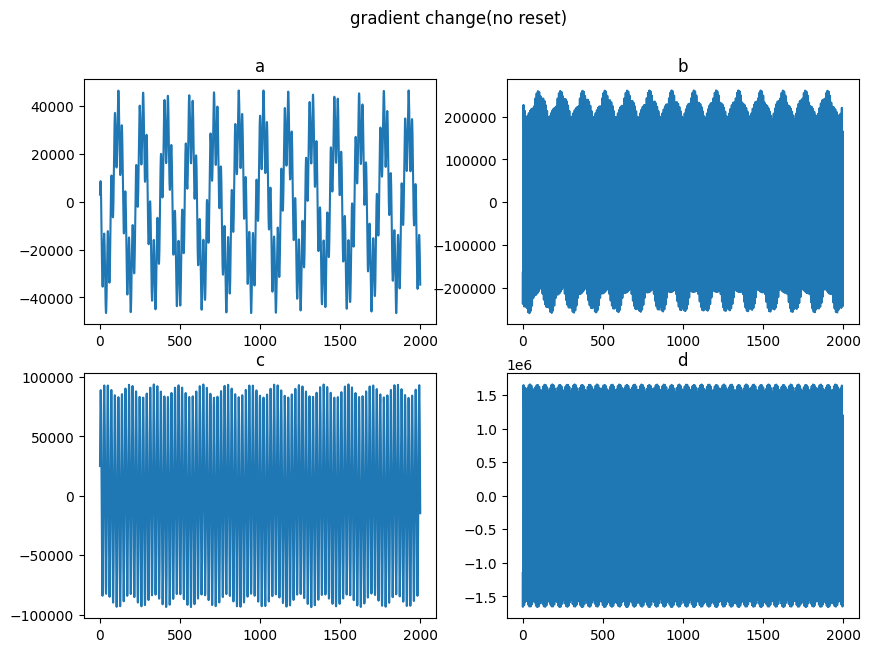

In [76]:
show_grad(grad_log_with_acc_gradient, 'gradient change(no reset)')

- Í∑∏ÎûòÎîîÏñ∏Ìä∏Ïùò Í∞íÏù¥ Í≥ÑÏÜçÌï¥ÏÑú Ïª§ÏßÄÎ©∞ Î≥ÄÌôî. Í∏∞Ïö∏Í∏∞ Ìè≠Ï£º(gradient explosion) Î¨∏Ï†ú ÏïºÍ∏∞Ìï† Ïàò ÏûàÏùå, Ïù¥Î°ú Ïù∏Ìï¥ ÌïôÏäµÏù¥ Ï†úÎåÄÎ°ú Ïù¥Î£®Ïñ¥ÏßÄÏßÄ ÏïäÎäî ÏÉÅÌô©

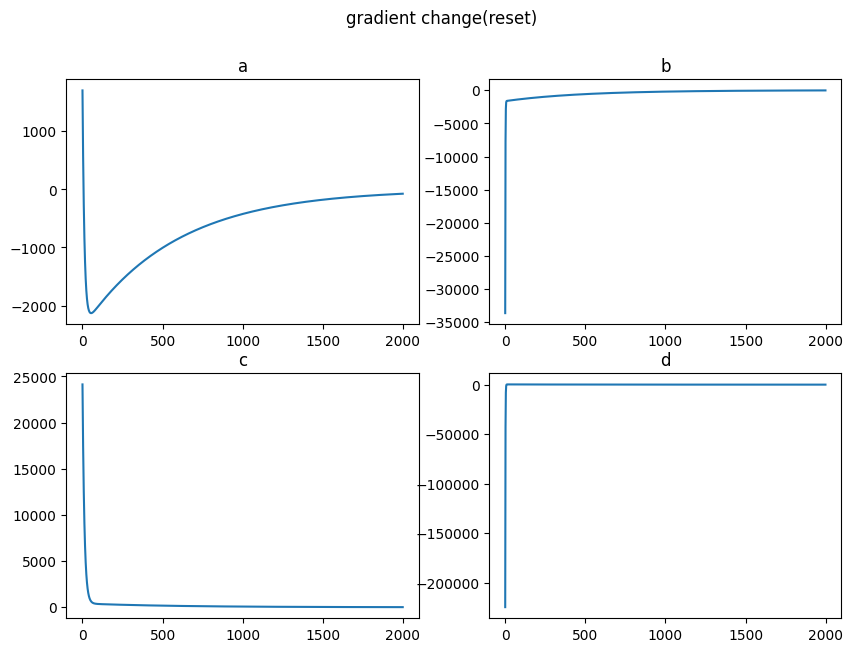

In [77]:
show_grad(grad_log_with_reset_gradient, 'gradient change(reset)')

- Í∑∏ÎûòÎîîÏñ∏Ìä∏Í∞Ä Ï†ÅÏ†àÌïòÍ≤å ÏàòÎ†¥ÌïòÎäî Í≤ÉÏùÑ Î≥¥ÏûÑ. Ïù¥ Í∑∏ÎûòÌîÑÎäî Í∞ÄÏ§ëÏπò Í∞±Ïã† ÌõÑ Í∏∞Ïö∏Í∏∞Î•º Ï¥àÍ∏∞Ìôî(reset)ÌïòÏó¨, Í∏∞Ïö∏Í∏∞Í∞Ä Ï†êÏ∞® ÏïàÏ†ïÎêòÎ©¥ÏÑú ÏàòÎ†¥ÌïòÎäî Í≥ºÏ†ï
- Ïù¥Îäî ÌïôÏäµÏù¥ Ïûò ÏßÑÌñâÎêòÍ≥† ÏûàÎã§Îäî Ïã†Ìò∏

### ÏàúÏÑú
1. TensorÎ•º ÏÇ¨Ïö©Ìïú Ïã†Í≤ΩÎßù
2. _~~torch.nn.functional ÏÇ¨Ïö©ÌïòÍ∏∞~~_
3. optmÏùÑ Ïù¥Ïö©ÌïòÏó¨ Î¶¨Ìå©ÌÜ†ÎßÅ ÌïòÍ∏∞
4. fit() ÏôÄ get_data() ÏÉùÏÑ±ÌïòÍ∏∞
5. CNN ÏúºÎ°ú ÎÑòÏñ¥Í∞ÄÍ∏∞

### torch.nn.functional ÏÇ¨Ïö©ÌïòÍ∏∞
- ÏΩîÎìúÎ•º Î¶¨Ìå©ÌÜ†ÎßÅ(refactoring). Ïù¥Ï†ÑÍ≥º ÎèôÏùºÌïòÏßÄÎßå, PyTorchÏùò `nn` ÌÅ¥ÎûòÏä§Ïùò Ïû•Ï†êÏùÑ ÌôúÏö©ÌïòÏó¨ Îçî Í∞ÑÍ≤∞ÌïòÍ≥† Ïú†Ïó∞ÌïòÍ≤å ÏÉùÏÑ±
- ÏßÅÏ†ë ÏûëÏÑ±ÌñàÎçò ~~ÌôúÏÑ±ÌôîÌï®Ïàò~~, ~~ÏÜêÏã§Ìï®Ïàò~~ Îì±ÏùÑ `torch.nn.functional`Ïóê Ï°¥Ïû¨ÌïòÎäî Ìï®ÏàòÎ°ú ÎåÄÏ≤¥
- Í¥ÄÎ°ÄÏ†ÅÏúºÎ°ú ÎÑ§ÏûÑÏä§ÌéòÏù¥Ïä§Î•º importÌïòÎ©∞ `F`Î°ú Ïù¥Î¶Ñ Î≥ÄÍ≤Ω
- Ïù¥ Î™®ÎìàÏóêÎäî `torch.nn` ÎùºÏù¥Î∏åÎü¨Î¶¨Ïùò Î™®Îì† Ìï®ÏàòÍ∞Ä Ìè¨Ìï®
- ÌíÄÎßÅ(pooling) Ìï®ÏàòÏôÄ Í∞ôÏù¥ Ïã†Í≤ΩÎßùÏùÑ ÎßåÎìúÎäîÎç∞ Ìé∏Î¶¨Ìïú Î™á Í∞ÄÏßÄ Ìï®ÏàòÎèÑ Ï°¥Ïû¨
- ÎßåÏïΩ Ïù¥Ï†ÑÏùò `log Softmax` ÌôúÏÑ±ÌôîÏôÄ `NLL` ÏÜêÏã§ÏùÑ ÏÇ¨Ïö©ÌïòÍ≥†Ïûê ÌïòÎ©¥, `F.cross_entropy` ÏÇ¨Ïö©ÌïòÎ©¥ Îê®

In [78]:
import torch.nn.functional as F

In [79]:
loss_func = F.cross_entropy

def model(xb):
    return xb @ weights + bias

In [80]:
print(loss_func(model(x_test), y_test), accuracy(model(x_test), y_test))

tensor(1.0573, grad_fn=<NllLossBackward0>) tensor(0.7942)


In [81]:
print(loss_func(model(x_test), y_test), accuracy(model(x_test), y_test))

tensor(1.0573, grad_fn=<NllLossBackward0>) tensor(0.7942)


#### nn.Module ÏùÑ Ïù¥Ïö©ÌïòÏó¨ Î¶¨Ìå©ÌÜ†ÎßÅ
- Îçî Î™ÖÌôïÌïòÍ≥† Í∞ÑÍ≤∞Ìïú ÌõàÎ†® Î£®ÌîÑÎ•º ÏúÑÌï¥ `nn.Module` Î∞è `nn.Parameter` Î•º ÏÇ¨Ïö©
- `nn.Module` (ÏûêÏ≤¥Í∞Ä ÌÅ¥ÎûòÏä§Ïù¥Í≥† ÏÉÅÌÉúÎ•º Ï∂îÏ≤ôÌï† Ïàò ÏûàÎäî) ÌïòÏúÑ ÌÅ¥ÎûòÏä§(subclass)Î•º ÏÉùÏÑ±
- PythonÏùò moduleÍ≥º Ìó∑Í∞àÎ¶¨ÏßÄ ÎßêÍ≤É

In [82]:
from torch import nn

In [83]:
class Mnist_Logistic(nn.Module):
    def __init__(self):
        super().__init__() # super()Î°ú Í∏∞Î∞ò ÌÅ¥ÎûòÏä§(Î∂ÄÎ™® ÌÅ¥ÎûòÏä§)Î•º Ï¥àÍ∏∞ÌôîÌï¥Ï§åÏúºÎ°úÏç®, Í∏∞Î∞ò ÌÅ¥ÎûòÏä§Ïùò ÏÜçÏÑ±ÏùÑ subclassÍ∞Ä Î∞õÏïÑÏò§ÎèÑÎ°ù ÌïúÎã§. (Ï¥àÍ∏∞ÌôîÎ•º ÌïòÏßÄ ÏïäÏúºÎ©¥, Î∂ÄÎ™® ÌÅ¥ÎûòÏä§Ïùò ÏÜçÏÑ±ÏùÑ ÏÇ¨Ïö©Ìï† Ïàò ÏóÜÏùå)
        self.weights = nn.Parameter(torch.randn(784, 10) / math.sqrt(784))
        self.bias = nn.Parameter(torch.zeros(10))

    def forward(self, xb):
        return xb @ self.weights + self.bias

- Ìï®ÏàòÎ•º ÏÇ¨Ïö©ÌïòÎäî ÎåÄÏã†Ïóê Ïù¥Ï†úÎäî Ïò§Î∏åÏ†ùÌä∏(object) Î•º ÏÇ¨Ïö©ÌïòÍ∏∞ ÎïåÎ¨∏Ïóê, Î®ºÏ†Ä Î™®Îç∏Ïùò Ïù∏Ïä§ÌÑ¥Ïä§Ìôî(instantiate) ÌïÑÏàò 

In [84]:
model = Mnist_Logistic() # Ïù∏Ïä§ÌÑ¥Ïä§Ìôî
model.to(device)

Mnist_Logistic()

- Ïù¥Ï†ÑÍ≥º ÎèôÏùºÌïú Î∞©ÏãùÏúºÎ°ú ÏÜêÏã§ÏùÑ Í≥ÑÏÇ∞
- `nn.Module` Ïò§Î∏åÏ†ùÌä∏Îì§ÏùÄ ÎßàÏπò Ìï®ÏàòÏ≤òÎüº ÏÇ¨Ïö© (Ï¶â, Ïù¥Îì§ÏùÄ *Ìò∏Ï∂úÍ∞ÄÎä•*), Í∑∏Îü¨ÎÇò Î∞∞ÌõÑÏóêÏÑú Pytorch Îäî Ïö∞Î¶¨Ïùò `forward` Î©îÏÜåÎìúÎ•º ÏûêÎèôÏúºÎ°ú Ìò∏Ï∂ú

In [85]:
print(loss_func(model(x_test), y_test), accuracy(model(x_test), y_test))

tensor(2.4619, grad_fn=<NllLossBackward0>) tensor(0.1213)


- Ïù¥Ï†ÑÏóêÎäî ÌõàÎ†® Î£®ÌîÑÎ•º ÏúÑÌï¥ Ïù¥Î¶Ñ Î≥ÑÎ°ú Í∞Å Îß§Í∞úÎ≥ÄÏàò Í∞íÏùÑ ÏóÖÎç∞Ïù¥Ìä∏ÌïòÍ≥† Í∞Å Îß§Í∞ú Î≥ÄÏàòÏóê ÎåÄÌïú Í∏∞Ïö∏Í∏∞Îì§ÏùÑ Í∞úÎ≥ÑÏ†ÅÏúºÎ°ú ÏàòÎèôÏúºÎ°ú 0ÏúºÎ°ú Ï†úÍ±∞Ìï¥Ïïº ÌñàÏùå.

```python
with torch.no_grad():
    weights -= weights.grad * lr
    bias -= bias.grad * lr
    weights.grad.zero_()
    bias.grad.zero_()
```

- Ïù¥Ï†ú model.parameters() Î∞è model.zero_grad() (Î™®Îëê `nn.Module` Ïóê ÎåÄÌï¥ PyTorchÏóê ÏùòÌï¥ Ï†ïÏùòÎê®)Î•º ÌôúÏö©ÌïòÏó¨ Ïù¥Îü¨Ìïú Îã®Í≥ÑÎ•º Îçî Í∞ÑÍ≤∞ÌïòÍ≤å ÎßåÎì§Í≥†, ÌäπÌûà Îçî Î≥µÏû°Ìïú Î™®Îç∏Ïóê ÎåÄÌï¥ÏÑú ÏùºÎ∂Ä Îß§Í∞úÎ≥ÄÏàòÎ•º ÏûäÏñ¥ Î≤ÑÎ¶¨Îäî Ïò§Î•òÎ•º Îçú Î∞úÏÉù

```python
with torch.no_grad():
    for p in model.parameters(): p -= p.grad * lr
        model.zero_grad()
```

- ÌõàÎ†® Ï†ÑÏóê Ìï≠ÏÉÅ `model.train()`ÏùÑ Ìò∏Ï∂úÌïòÍ≥†, Ï∂îÎ°†(inference) Ï†ÑÏóê `model.eval()`ÏùÑ Ìò∏Ï∂ú
- `nn.BatchNorm2d` Î∞è `nn.Dropout`Í≥º Í∞ôÏùÄ Î†àÏù¥Ïñ¥ÏóêÏÑú Ïù¥Îü¨Ìïú Îã§Î•∏ Îã®Í≥Ñ(ÌõàÎ†®, Ï∂îÎ°†) Ïóê ÎåÄÌïú Ï†ÅÏ†àÌïú ÎèôÏûëÏù¥ ÏùºÏñ¥ÎÇòÍ≤å ÌïòÍ∏∞ ÏúÑÌï®

In [86]:
def fit(model, train_dl, val_dl): # Ìï®ÏàòÌôî Ïô∏ÏóêÎäî ÎÇòÎ®∏ÏßÄ ÎÇ¥Ïö©ÏùÄ Ïù¥Ï†Ñ Î∞òÎ≥µÎ°úÏßÅÍ≥º ÎèôÏùº!!
    for epoch in range(epochs):
        model.train()
        for xb, yb in train_dl:
            xb = xb.to(device)
            yb = yb.to(device)
            pred = model(xb)
            loss = loss_func(pred, yb)

            loss.backward()
            with torch.no_grad():  # ÎçîÏù¥ÏÉÅ weights, bias Î∂àÌïÑÏöî
                for p in model.parameters():
                    p -= p.grad * lr
                model.zero_grad()

        model.eval()
        with torch.no_grad():
            val_loss, val_acc = 0, 0
            for xb, yb in val_dl:
                xb = xb.to(device)
                yb = yb.to(device)
                val_loss += loss_func(model(xb), yb)
                val_acc += accuracy(model(xb), yb)

            print(f'epoch {epoch+1} >>> val loss({val_loss / len(val_dl):.7f}), acc({val_acc / len(val_dl):.7f})')


print(f'[before] loss : {loss_func(model(x_test), y_test)}')
print(f'[before] acc : {accuracy(model(x_test), y_test)}')

lr = 0.5  # ÌïôÏäµÎ•†(learning rate)
epochs = 7  # ÌõàÎ†®Ïóê ÏÇ¨Ïö©Ìï† ÏóêÌè≠(epoch) Ïàò
fit(model, train_dl, val_dl)

print(f'[after ] loss : {loss_func(model(x_test), y_test)}')
print(f'[after ] acc : {accuracy(model(x_test), y_test)}')

[before] loss : 2.461937189102173
[before] acc : 0.12129999697208405
epoch 1 >>> val loss(1.2840121), acc(0.7616911)
epoch 2 >>> val loss(0.7053986), acc(0.8194259)
epoch 3 >>> val loss(0.7682904), acc(0.8086768)
epoch 4 >>> val loss(0.7477525), acc(0.8308954)
epoch 5 >>> val loss(0.8474919), acc(0.8157137)
epoch 6 >>> val loss(0.8494842), acc(0.8178192)
epoch 7 >>> val loss(0.9035476), acc(0.8042996)
[after ] loss : 0.9601974487304688
[after ] acc : 0.795199990272522


#### nn.Linear Î•º Ïù¥Ïö©ÌïòÏó¨ Î¶¨Ìå©ÌÜ†ÎßÅ
- `self.weights` Î∞è `self.bias`Î•º ÏàòÎèôÏúºÎ°ú Ï†ïÏùò Î∞è Ï¥àÍ∏∞ÌôîÌïòÍ≥†, `xb  @ self.weights + self.bias`Î•º Í≥ÑÏÇ∞ÌïòÎäî ÎåÄÏã†Ïóê, ÏúÑÏùò Î™®Îì† Í≤ÉÏùÑ Ìï¥Ï§Ñ Pytorch ÌÅ¥ÎûòÏä§Ïù∏ [nn.Linear](https://pytorch.org/docs/stable/nn.html#linear-layers)Î•º ÏÑ†Ìòï Î†àÏù¥Ïñ¥Î°ú ÏÇ¨Ïö©
- PytorchÏóêÎäî Îã§ÏñëÌïú Ïú†ÌòïÏùò ÏΩîÎìúÎ•º ÌÅ¨Í≤å Îã®ÏàúÌôî Ìï† Ïàò ÏûàÎäî ÎØ∏Î¶¨ Ï†ïÏùòÎêú Î†àÏù¥Ïñ¥Í∞Ä ÏûàÍ≥† Ïù¥Îäî ÎòêÌïú Ï¢ÖÏ¢Ö Í∏∞Ï°¥ ÏΩîÎìúÎ≥¥Îã§ ÏÜçÎèÑÎ•º Îπ†Î•¥Í≤å

In [87]:
class Mnist_Logistic(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin = nn.Linear(784, 10)

    def forward(self, xb):
        return self.lin(xb)

- Ïù¥Ï†ÑÍ≥º Í∞ôÏùÄ Î∞©ÏãùÏúºÎ°ú Î™®Îç∏ÏùÑ Ïù∏Ïä§ÌÑ¥Ïä§ÌôîÌïòÍ≥† ÏÜêÏã§ÏùÑ Í≥ÑÏÇ∞

In [88]:
model = Mnist_Logistic().to(device)
print(loss_func(model(x_test), y_test), accuracy(model(x_test), y_test))

tensor(2.3076, grad_fn=<NllLossBackward0>) tensor(0.0785)


- Ïö∞Î¶¨Îäî Ïó¨Ï†ÑÌûà Ïù¥Ï†ÑÍ≥º ÎèôÏùºÌïú `fit` Î©îÏÜåÎìúÎ•º ÏÇ¨Ïö©

In [89]:
print(f'[before] loss : {loss_func(model(x_test), y_test)}')
print(f'[before] acc : {accuracy(model(x_test), y_test)}')

lr = 0.5  # ÌïôÏäµÎ•†(learning rate)
epochs = 8  # ÌõàÎ†®Ïóê ÏÇ¨Ïö©Ìï† ÏóêÌè≠(epoch) Ïàò
fit(model, train_dl, val_dl)

print(f'[after ] loss : {loss_func(model(x_test), y_test)}')
print(f'[after ] acc : {accuracy(model(x_test), y_test)}')

[before] loss : 2.3075642585754395
[before] acc : 0.07850000262260437
epoch 1 >>> val loss(0.7857454), acc(0.8126662)
epoch 2 >>> val loss(1.0113095), acc(0.7696143)
epoch 3 >>> val loss(0.9140227), acc(0.7943817)
epoch 4 >>> val loss(0.8966446), acc(0.8007536)
epoch 5 >>> val loss(0.8584960), acc(0.8070146)
epoch 6 >>> val loss(0.6442242), acc(0.8411459)
epoch 7 >>> val loss(0.7535762), acc(0.8139960)
epoch 8 >>> val loss(0.6267271), acc(0.8350509)
[after ] loss : 0.6621344685554504
[after ] acc : 0.8212000131607056


### ÏàúÏÑú
1. TensorÎ•º ÏÇ¨Ïö©Ìïú Ïã†Í≤ΩÎßù
2. torch.nn.functional ÏÇ¨Ïö©ÌïòÍ∏∞
3. _~~optmÏùÑ Ïù¥Ïö©ÌïòÏó¨ Î¶¨Ìå©ÌÜ†ÎßÅ ÌïòÍ∏∞~~_
4. fit() ÏôÄ get_data() ÏÉùÏÑ±ÌïòÍ∏∞
5. CNN ÏúºÎ°ú ÎÑòÏñ¥Í∞ÄÍ∏∞

### optmÏùë Ïù¥Ïö©, Î¶¨Ìå©ÌÜ†ÎßÅ ÌïòÍ∏∞
- Îã§ÏñëÌïú ÏµúÏ†ÅÌôî(optimization) ÏïåÍ≥†Î¶¨Ï¶òÏùÑ Í∞ÄÏßÑ Ìå®ÌÇ§ÏßÄÏù∏ `torch.optim`
- Í∞Å Îß§Í∞úÎ≥ÄÏàòÎ•º ÏàòÎèôÏúºÎ°ú ÏóÖÎç∞Ïù¥Ìä∏ ÌïòÎäî ÎåÄÏã†, ÏòµÌã∞ÎßàÏù¥Ï†Ä(optimizer)Ïùò `step` Î©îÏÜåÎìúÎ•º ÏÇ¨Ïö©ÌïòÏó¨ ÏóÖÎç∞Ïù¥Ìä∏Î•º ÏßÑÌñâ
- Ïù¥Ï†Ñ ÏàòÎèôÏúºÎ°ú ÏΩîÎî©Ìïú ÏµúÏ†ÅÌôî Îã®Í≥ÑÎ•º ÎåÄÏ≤¥

```python
with torch.no_grad():
    for p in model.parameters(): p -= p.grad * lr
    model.zero_grad()
```

ÎåÄÏã†Ïóê ÏïÑÎûòÎ°ú ÎåÄÏ≤¥

```python
opt.step()
opt.zero_grad()
```

- `optim.zero_grad()` Îäî Í∏∞Ïö∏Í∏∞Î•º 0ÏúºÎ°ú Ïû¨ÏÑ§Ï†ï

In [90]:
from torch import optim

- ÎÇòÏ§ëÏóê Îã§Ïãú ÏÇ¨Ïö©Ìï† Ïàò ÏûàÎèÑÎ°ù Î™®Îç∏Í≥º ÏòµÌã∞ÎßàÏù¥Ï†∏Î•º ÎßåÎìúÎäî ÏûëÏùÄ Ìï®ÏàòÎ•º Ï†ïÏùò

In [91]:
def get_model():
    model = Mnist_Logistic().to(device)
    return model, optim.SGD(model.parameters(), lr=lr) # optim.SGD(parameter, learning_rate) : stochastic gradient descent Íµ¨ÌòÑ

In [92]:
model, opt = get_model()

epochs = 7

print(f'[before] loss : {loss_func(model(x_test), y_test)}')
print(f'[before] acc : {accuracy(model(x_test), y_test)}')

for epoch in range(epochs):
    model.train()
    for xb, yb in train_dl:
            xb = xb.to(device)
            yb = yb.to(device)
            pred = model(xb)
            loss = loss_func(pred, yb)

            loss.backward()
            opt.step()
            opt.zero_grad()

    model.eval()
    with torch.no_grad():
        val_loss, val_acc = 0, 0
        for xb, yb in val_dl:
            xb = xb.to(device)
            yb = yb.to(device)
            val_loss += loss_func(model(xb), yb)
            val_acc += accuracy(model(xb), yb)

    print(f'epoch {epoch+1} >>> val loss({val_loss / len(val_dl):.7f}), acc({val_acc / len(val_dl):.7f})')
        
print(f'[after ] loss : {loss_func(model(x_test), y_test)}')
print(f'[after ] acc : {accuracy(model(x_test), y_test)}')

[before] loss : 2.3648388385772705
[before] acc : 0.04280000180006027
epoch 1 >>> val loss(0.9170389), acc(0.8099512)
epoch 2 >>> val loss(0.9133105), acc(0.7995346)
epoch 3 >>> val loss(1.0517020), acc(0.7889517)
epoch 4 >>> val loss(0.6675639), acc(0.8290116)
epoch 5 >>> val loss(0.7802050), acc(0.8330009)
epoch 6 >>> val loss(1.4716874), acc(0.7073360)
epoch 7 >>> val loss(0.6041015), acc(0.8424757)
[after ] loss : 0.6344831585884094
[after ] acc : 0.8374999761581421


### ÏàúÏÑú
1. TensorÎ•º ÏÇ¨Ïö©Ìïú Ïã†Í≤ΩÎßù
2. torch.nn.functional ÏÇ¨Ïö©ÌïòÍ∏∞
3. optmÏùÑ Ïù¥Ïö©ÌïòÏó¨ Î¶¨Ìå©ÌÜ†ÎßÅ ÌïòÍ∏∞
4.  _~~fit() ÏôÄ get_data() ÏÉùÏÑ±ÌïòÍ∏∞~~_
5. CNN ÏúºÎ°ú ÎÑòÏñ¥Í∞ÄÍ∏∞

### fit() ÏôÄ get_data() ÏÉùÏÑ±ÌïòÍ∏∞
- ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ÏÖãÍ≥º Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ÏÖã Î™®ÎëêÏóê ÎåÄÌïú ÏÜêÏã§ÏùÑ Í≥ÑÏÇ∞ÌïòÎäî Ïú†ÏÇ¨Ìïú ÌîÑÎ°úÏÑ∏Ïä§Î•º Îëê Î≤à Ï≤òÎ¶¨
- ÌïòÎÇòÏùò Î∞∞ÏπòÏóê ÎåÄÌïú ÏÜêÏã§ÏùÑ Í≥ÑÏÇ∞ÌïòÎäî ÏûêÏ≤¥ Ìï®Ïàò `loss_batch` Î°ú ÏÉùÏÑ±
- ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ÏÖãÏóê ÎåÄÌïú ÏòµÌã∞ÎßàÏù¥Ï†ÄÎ•º Ï†ÑÎã¨ÌïòÍ≥† Ïù¥Î•º ÏÇ¨Ïö©ÌïòÏó¨ Ïó≠Ï†ÑÌååÎ•º ÏàòÌñâ
- Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ÏÖãÏùò Í≤ΩÏö∞ ÏòµÌã∞ÎßàÏù¥Ï†ÄÎ•º Ï†ÑÎã¨ÌïòÏßÄ ÏïäÏúºÎØÄÎ°ú Î©îÏÜåÎìúÍ∞Ä Ïó≠Ï†ÑÌååÎ•º ÏàòÌñâÌïòÏßÄ ÏïäÏùå

In [93]:
def loss_batch(model, loss_func, xb, yb, opt=None):
    loss = loss_func(model(xb), yb)

    if opt is not None:
        loss.backward()
        opt.step()
        opt.zero_grad()

    return loss.item(), len(xb)

- `fit` ÏùÄ Î™®Îç∏ÏùÑ ÌõàÎ†®ÌïòÍ≥† Í∞Å ÏóêÌè≠Ïóê ÎåÄÌïú ÌõàÎ†® Î∞è Í≤ÄÏ¶ù ÏÜêÏã§ÏùÑ Í≥ÑÏÇ∞ÌïòÎäî ÏûëÏóÖÏùÑ ÏàòÌñâ

In [94]:
import numpy as np

def fit(epochs, model, loss_func, opt, train_dl, val_dl):
    for epoch in range(epochs):
        model.train()
        for xb, yb in train_dl:
            loss_batch(model, loss_func, xb, yb, opt)

        model.eval()
        with torch.no_grad():
            losses, nums = zip(
                *[loss_batch(model, loss_func, xb, yb) for xb, yb in val_dl] # zip(*iterable)Ïùò *iterableÏùÄ Î∞òÎ≥µ Í∞ÄÎä•(iterable)Ìïú ÏûêÎ£åÌòï Ïó¨Îü¨ Í∞úÎ•º ÏûÖÎ†•Ìï† Ïàò ÏûàÎã§Îäî ÏùòÎØ∏
            )

        val_loss = np.sum(np.multiply(losses, nums)) / np.sum(nums) # np.multiply(x1, x2): Ïù∏ÏàòÎ•º ÏöîÏÜåÎ≥ÑÎ°ú Í≥±Ìï©ÎãàÎã§.

        print("epoch : ", epoch, ", val_loss : ", val_loss)

In [95]:
def get_data(train_ds, valid_ds, bs):
    return (
        DataLoader(train_ds, batch_size=bs, shuffle=True),
        DataLoader(valid_ds, batch_size=bs*2), # Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ÏÖãÏóê ÎåÄÌï¥ÏÑúÎäî Ïó≠Ï†ÑÌåå(backpropagation)Í∞Ä ÌïÑÏöîÌïòÏßÄ ÏïäÏúºÎØÄÎ°ú 
                                               # Î©îÎ™®Î¶¨Î•º Îçú ÏÇ¨Ïö©ÌïòÍ∏∞ ÎïåÎ¨∏Ïóê Î∞∞Ïπò ÏÇ¨Ïù¥Ï¶àÎ•º ÎäòÎ¶¥ Ïàò ÏûàÎã§.
    )

- `get_data`Îäî ÌïôÏäµ Î∞è Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ÏÖãÏóê ÎåÄÌïú dataloader Î•º Ï∂úÎ†•

In [96]:
bs = 64 # batch size
train_dl, val_dl = get_data(train_ds, val_ds, bs)
model, opt = get_model()

print(f'[before] loss : {loss_func(model(x_test), y_test)}')
print(f'[before] acc : {accuracy(model(x_test), y_test)}')

fit(epochs, model, loss_func, opt, train_dl, val_dl)

print(f'[after ] loss : {loss_func(model(x_test), y_test)}')
print(f'[after ] acc : {accuracy(model(x_test), y_test)}')

[before] loss : 2.369633197784424
[before] acc : 0.07540000230073929
epoch :  0 , val_loss :  0.9449777487119039
epoch :  1 , val_loss :  1.7446106595993043
epoch :  2 , val_loss :  0.8932848943074544
epoch :  3 , val_loss :  1.2178296626408895
epoch :  4 , val_loss :  0.9595538717905681
epoch :  5 , val_loss :  1.317973879814148
epoch :  6 , val_loss :  1.2218276077906292
[after ] loss : 1.2145445346832275
[after ] acc : 0.8015999794006348


### Ï§ëÍ∞ÑÏ†ïÎ¶¨
- MNIST Fashion datasetÏùÑ Î∂ÑÎ•òÌïòÎäî Í∞ÑÎã®Ìïú ÏÑ†Ìòï Î∂ÑÎ•òÍ∏∞Î•º ÏïÑÎûòÏùò Îã®Í≥ÑÎ•º Í±∏ÏπòÎ©∞ Î≥ÄÌòï
    1. TensorÏôÄ autogradÎßåÏùÑ Ïù¥Ïö©Ìïú Ïã†Í≤ΩÎßù Íµ¨Ï∂ï
    2. nn.functionalÏùÑ Ïù¥Ïö©ÌïòÏó¨ ÌôúÏÑ±Ìôî Ìï®Ïàò/ÏÜêÏã§ Ìï®Ïàò ÎåÄÏ≤¥ üëâ Ìï¥Îãπ Ìï®ÏàòÎì§ÏùÑ ÏßÅÏ†ë ÏûëÏÑ±ÌïòÏßÄ ÏïäÏïÑÎèÑ ÎêòÍ≤å Îê®
    3. nn.ModuleÎ•º Ïù¥Ïö©ÌïòÏó¨ Î™®Îç∏ÏùÑ Î™®ÎìàÌôî üëâ gradient Ï¥àÍ∏∞ÌôîÍ∞Ä Í∞ÑÌé∏Ìï¥Ïßê
    4. nn.LinearÎ•º Ïù¥Ïö©ÌïòÏó¨ Î™®Îç∏ Ï†ïÏùò üëâ Í∞ÄÏ§ëÏπò/Ìé∏Ìñ• Ï¥àÍ∏∞ÌôîÏôÄ forwardÎ•º ÏßÅÏ†ë ÏûëÏÑ±ÌïòÏßÄ ÏïäÏïÑÎèÑ ÎêòÍ≤å Îê®
    5. optmÏùÑ Ïù¥Ïö©ÌïòÏó¨ Í∞ÄÏ§ëÏπò ÏóÖÎç∞Ïù¥Ìä∏

### ÏàúÏÑú
1. TensorÎ•º ÏÇ¨Ïö©Ìïú Ïã†Í≤ΩÎßù
2. torch.nn.functional ÏÇ¨Ïö©ÌïòÍ∏∞
3. optmÏùÑ Ïù¥Ïö©ÌïòÏó¨ Î¶¨Ìå©ÌÜ†ÎßÅ ÌïòÍ∏∞
4. fit() ÏôÄ get_data() ÏÉùÏÑ±ÌïòÍ∏∞
5. _~~CNN ÏúºÎ°ú ÎÑòÏñ¥Í∞ÄÍ∏∞~~_

### CNN ÏúºÎ°ú ÎÑòÏñ¥Í∞ÄÍ∏∞
- Ïù¥Ï†ú 3Í∞úÏùò Ïª®Î≥ºÎ£®ÏÖò Î†àÏù¥Ïñ¥Î°ú Ïã†Í≤ΩÎßùÏùÑ Íµ¨Ï∂ï.
- Ïù¥Ï†Ñ ÏÑπÏÖòÏùò Ïñ¥Îñ§ Ìï®ÏàòÎèÑ Î™®Îç∏Ïùò ÌòïÏãùÏóê ÎåÄÌï¥ Í∞ÄÏ†ïÌïòÏßÄ ÏïäÍ∏∞ ÎïåÎ¨∏Ïóê, Î≥ÑÎèÑÏùò ÏàòÏ†ïÏóÜÏù¥ CNNÏùÑ ÌïôÏäµÌïòÎäî Îç∞ ÏÇ¨Ïö© Í∞ÄÎä•

#### 1. nn.Module
- Pytorch Ïùò ÏÇ¨Ï†ÑÏ†ïÏùòÎêú [Conv2d](https://pytorch.org/docs/stable/nn.html#torch.nn.Conv2d) ÌÅ¥ÎûòÏä§Î•º Ïª®Î≥ºÎ£®ÏÖò Î†àÏù¥Ïñ¥Î°ú ÏÇ¨Ïö©
- 3Í∞úÏùò Ïª®Î≥ºÎ£®ÏÖò Î†àÏù¥Ïñ¥Î°ú CNNÏùÑ Ï†ïÏùò
- Í∞Å Ïª®Î≥ºÎ£®ÏÖò Îí§ÏóêÎäî ReLUÍ∞Ä Ï°¥Ïû¨. ÎßàÏßÄÎßâÏúºÎ°ú ÌèâÍ∑† ÌíÄÎßÅ(average pooling)ÏùÑ ÏàòÌñâ.(`view` Îäî PyTorchÏùò numpy `reshape` Î≤ÑÏ†Ñ)

In [97]:
class Mnist_CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=2, padding=1)
        self.conv2 = nn.Conv2d(16, 16, kernel_size=3, stride=2, padding=1)
        self.conv3 = nn.Conv2d(16, 10, kernel_size=3, stride=2, padding=1)

    def forward(self, xb):
        xb = xb.view(-1, 1, 28, 28)
        xb = F.relu(self.conv1(xb))
        xb = F.relu(self.conv2(xb))
        xb = F.relu(self.conv3(xb))
        xb = F.avg_pool2d(xb, 4)
        return xb.view(-1, xb.size(1))

lr = 0.1